# Logistic Regression from Scratch

This notebook demonstrates how to implement logistic regression using gradient descent to classify synthetic data.

## 1. Generate Synthetic Classification Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate synthetic classification data
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
y = ((x1**2 + x2**2 + np.random.normal(0, 1, n)) > 1.5).astype(int)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data.head()

,x1,x2,y
0,0.496714,1.399355,1
1,-0.138264,0.924634,0
2,0.647689,0.059630,0
3,1.523030,-0.646937,1
4,-0.234153,0.698223,0


## 2. Define Helper Functions
### 2.1 Sigmoid Function
Used to convert raw model output to probability values.

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 2.2 Predict Function
Compute predicted probabilities using the logistic model.

In [3]:
def predict(X, w):
    z = np.dot(X, w)
    return sigmoid(z)

### 2.3 Log Loss Function
Binary cross-entropy loss to quantify prediction error.

In [4]:
def log_loss(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

### 2.4 Gradient Computation
Compute gradient of the loss with respect to weights.

In [5]:
def compute_gradient(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

## 3. Prepare Feature Matrix and Initialize Parameters

In [6]:
# Add bias (intercept) term
X = data[['x1', 'x2']].values
X = np.hstack([np.ones((n, 1)), X])
y = data['y'].values

# Initialize weights
w = np.zeros(X.shape[1])
lr = 0.1
epochs = 1000
loss_history = []

## 4. Training via Gradient Descent
Iteratively update weights to minimize the log-loss.

In [7]:
for epoch in range(epochs):
    y_pred = predict(X, w)
    loss = log_loss(y, y_pred)
    grad = compute_gradient(X, y, y_pred)
    w -= lr * grad
    loss_history.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6900
Epoch 200: Loss = 0.6899
Epoch 300: Loss = 0.6899
Epoch 400: Loss = 0.6899
Epoch 500: Loss = 0.6899
Epoch 600: Loss = 0.6899
Epoch 700: Loss = 0.6899
Epoch 800: Loss = 0.6899
Epoch 900: Loss = 0.6899


## 5. Visualize Decision Boundary

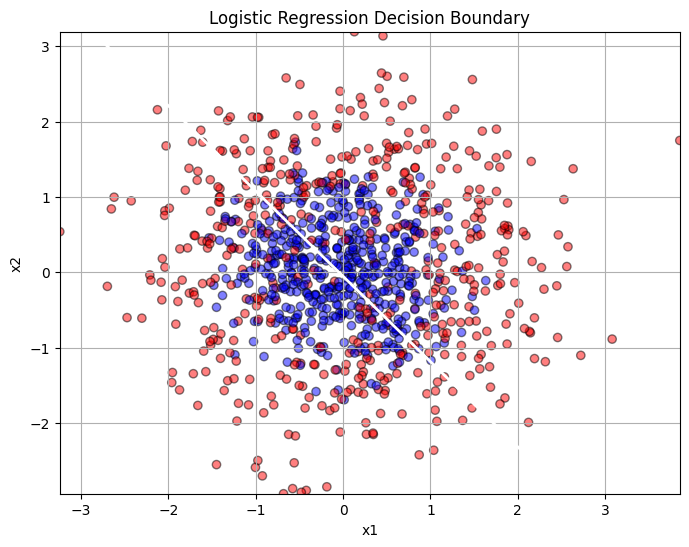

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(data['x1'], data['x2'], c=y, cmap='bwr', alpha=0.5, edgecolors='k')

x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 200),
                               np.linspace(x2.min(), x2.max(), 200))
X_grid = np.c_[np.ones(x1_grid.ravel().shape), x1_grid.ravel(), x2_grid.ravel()]
Z = predict(X_grid, w).reshape(x1_grid.shape)

plt.contour(x1_grid, x2_grid, Z, levels=[0.5], cmap="Greys", linewidths=2)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

## 6. Visualize Training Loss

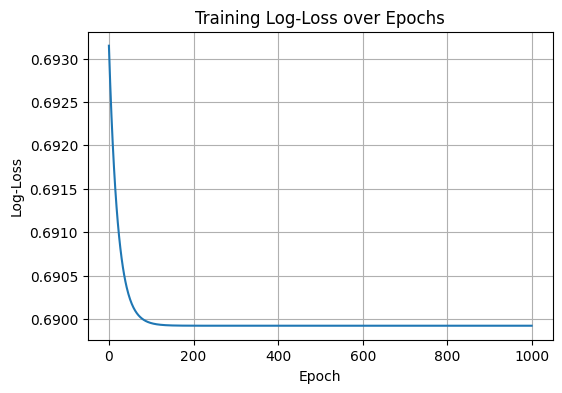

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.title("Training Log-Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log-Loss")
plt.grid(True)
plt.show()